# COVID-19 Global Data Analysis & Visualization
This project explores and visualizes global COVID-19 data using Python (Pandas, Matplotlib, Seaborn).  
We will clean the data, perform exploratory data analysis (EDA), and create insightful visualizations.

## Data Loading
In this section, we load the COVID-19 dataset and take a first look at its structure.

In [2]:
import pandas as pd
df = pd.read_csv('../data/covid_19_data.csv')
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


## Data Cleaning
In this section, we check for missing values, correct data types, and prepare the dataset for analysis.

In [3]:
  df.info()
  df.describe()
  df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


In [9]:
  print(df.describe())

                      Date     Confirmed         Deaths     Recovered  \
count                35156  3.515600e+04   35156.000000  3.515600e+04   
mean   2020-04-24 12:00:00  2.356663e+04    1234.068239  1.104813e+04   
min    2020-01-22 00:00:00  0.000000e+00       0.000000  0.000000e+00   
25%    2020-03-08 18:00:00  1.000000e+00       0.000000  0.000000e+00   
50%    2020-04-24 12:00:00  2.500000e+02       4.000000  3.300000e+01   
75%    2020-06-10 06:00:00  3.640250e+03      78.250000  1.286250e+03   
max    2020-07-27 00:00:00  4.290259e+06  148011.000000  1.846641e+06   
std                    NaN  1.499818e+05    7437.238354  6.454640e+04   

             Active    New cases    New deaths  New recovered  
count  3.515600e+04  35156.00000  35156.000000   35156.000000  
mean   1.128443e+04    469.36375     18.603339     269.315593  
min   -2.000000e+00      0.00000  -1918.000000  -16298.000000  
25%    0.000000e+00      0.00000      0.000000       0.000000  
50%    8.500000e+01   

In [10]:
 print(df.isnull().sum())

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

## Exploratory Data Analysis (EDA)
In this section, we explore the COVID-19 data to answer key questions:
- Which countries had the highest confirmed cases and deaths?
- What are the weekly and monthly growth trends in cases?
- What is the mortality rate by country?

In [13]:
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date]

top_confirmed = latest_data.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
top_deaths = latest_data.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)

print("Top 10 countries by confirmed cases:")
print(top_confirmed)
print("\nTop 10 countries by deaths:")
print(top_deaths)

Top 10 countries by confirmed cases:
Country/Region
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     301708
Iran               293606
Name: Confirmed, dtype: int64

Top 10 countries by deaths:
Country/Region
US                148011
Brazil             87618
United Kingdom     45844
Mexico             44022
Italy              35112
India              33408
France             30212
Spain              28432
Peru               18418
Iran               15912
Name: Deaths, dtype: int64


In [16]:
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly = df.groupby('Week')['Confirmed'].sum().diff().fillna(0)

df['Month'] = df['Date'].dt.to_period('M').apply(lambda r: r.start_time)
monthly = df.groupby('Month')['Confirmed'].sum().diff().fillna(0)

print("Weekly new cases:")
print(weekly.tail())
print("\nMonthly new cases:")
print(monthly.tail())

Weekly new cases:
Week
2020-06-29     8920047.0
2020-07-06     9841810.0
2020-07-13    10747030.0
2020-07-20    11827141.0
2020-07-27   -92009053.0
Name: Confirmed, dtype: float64

Monthly new cases:
Month
2020-03-01      7339378.0
2020-04-01     54388847.0
2020-05-01     81598737.0
2020-06-01    101535388.0
2020-07-01    116370061.0
Name: Confirmed, dtype: float64


In [24]:
# Get the latest date in the dataset
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Calculate mortality rate
latest_data['Mortality Rate'] = latest_data['Deaths'] / latest_data['Confirmed']

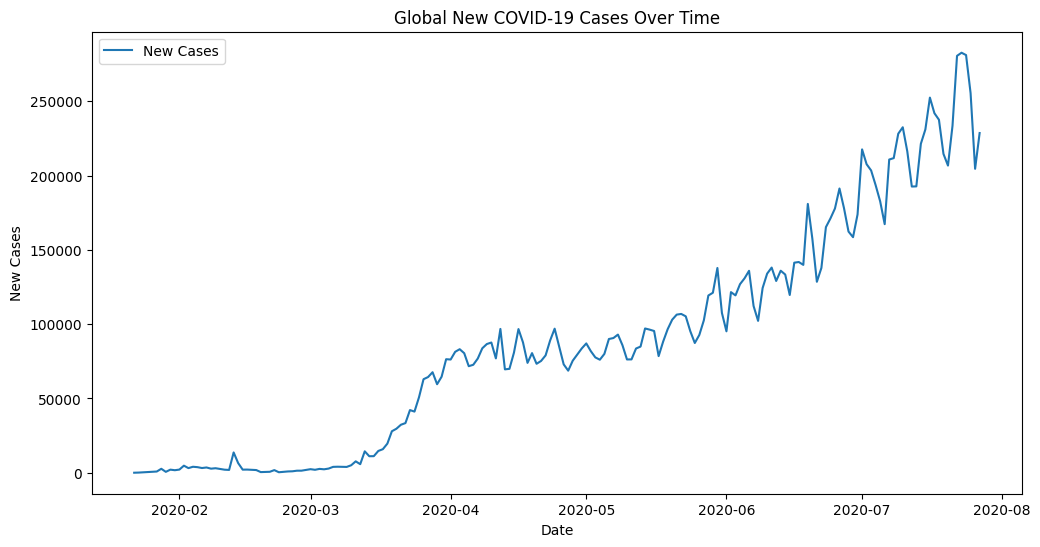

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

global_new_cases = df.groupby('Date')['New cases'].sum()
plt.figure(figsize=(12,6))
plt.plot(global_new_cases.index, global_new_cases.values, label='New Cases')
plt.title('Global New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()

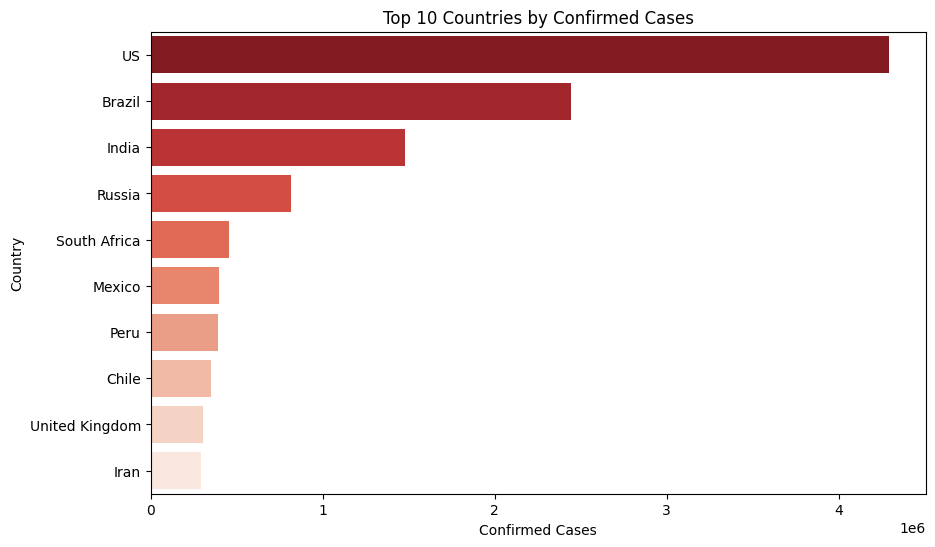

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_confirmed.values,
    y=top_confirmed.index,
    hue=top_confirmed.index,           # Add this line
    palette='Reds_r',
    legend=False                       # Add this line
)
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()

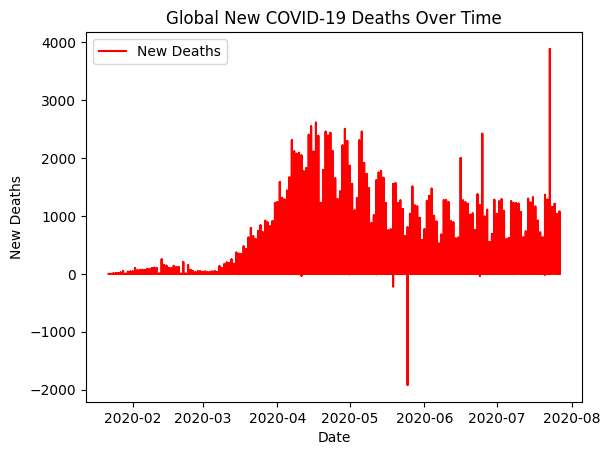

In [20]:
plt.plot(df['Date'], df['New deaths'], label='New Deaths', color='red')
plt.title("Global New COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.legend()
plt.show()


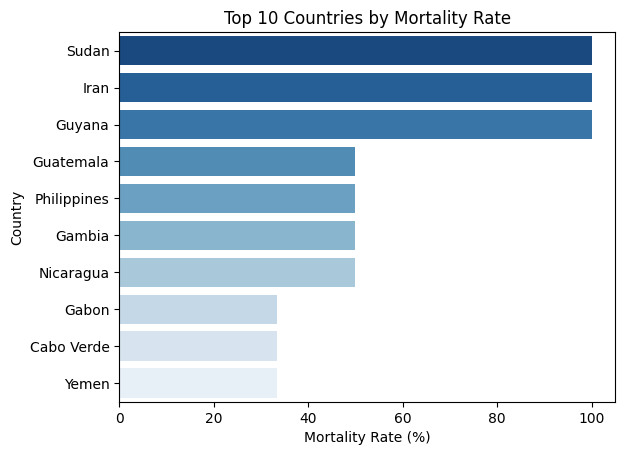

In [23]:
df['Mortality Rate'] = (df['Deaths'] / df['Confirmed']) * 100
top_mortality = df.groupby('Country/Region')['Mortality Rate'].max().sort_values(ascending=False).head(10)

sns.barplot(
    x=top_mortality.values,
    y=top_mortality.index,
    hue=top_mortality.index,      # Add this line
    palette='Blues_r',
    legend=False                  # Add this line
)
plt.title("Top 10 Countries by Mortality Rate")
plt.xlabel("Mortality Rate (%)")
plt.ylabel("Country")
plt.show()


## Key Insights
- US, Brazil, and India reported the highest confirmed cases.
- Cases increased rapidly from March to July 2020.
- Mortality rates vary significantly across countries.


## Conclusions
**Summary of findings:**
- Identified the most affected countries by confirmed cases and deaths.
- Analyzed weekly and monthly growth trends.
- Calculated and compared mortality rates by country.
- Visualized key patterns in the data.

This analysis provides a foundation for further exploration or dashboard creation in Power BI or Tableau.

In [30]:
# Export the cleaned DataFrame to a CSV file
df.to_csv('../outputs/cleaned_covid19_global.csv', index=False)